# Sprint 4: Project 4 - Exploring Used Vehicle Pricing:

*Introduction:*

Within this notebook I will perform some basic exploratory data analysis of the dataset for used vehicles for sale, as well as clean & process the data for later use. Based on my findings I will build some graphs & reference my work here to build a web app to display some results. My goal is to group data appropriately so it can be used to show vehicles by price based on certain attributes. 

In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np

import math as mt

from scipy import stats as st 
from scipy.stats import norm 
from math import factorial
from matplotlib import pyplot as plt
import scipy.stats as stats
import plotly.express as px


In [2]:

# Load the dataset

df_vehicles = pd.read_csv('../vehicles_us.csv')
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


**Student Note:** The 'model_year' needs to be converted to integers since years are not floats. Under 'type' SUV is in all caps, will need to make this lowercase incase there's not consistency with capitalization throught the dataset. 'is_4wd' should be changed to Boolean. 'Odometer' can be changed to integer. 'date_posted' is currently an object but needs to be converted to datatime data type. There seem to be some missing values as well. I will address these by finding the median per column & filling NaN values with the median. 

In [3]:
# Convert all values to lowercase within the 'type' column
# This will help me deal with any duplicate rows later

df_vehicles['type'] = df_vehicles['type'].str.lower()

In [4]:
# Create a new column 'manufacturer' by getting the first word from the 'model' column

df_vehicles['manufacturer'] = df_vehicles['model'].apply(lambda x: x.split()[0])

display(df_vehicles.head(10))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,1.0,2018-06-23,19,bmw
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,hyundai
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,chrysler
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,chrysler
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73,toyota
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,suv,black,1.0,2019-01-07,68,honda
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,suv,NaN,1.0,2018-07-16,19,kia
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,suv,blue,1.0,2019-02-15,17,honda


In [5]:
# Calculate median model year for each model
median_model_year = df_vehicles.groupby('model')['model_year'].transform('median')

# Fill missing values in 'model_year' with the corresponding median model year
df_vehicles['model_year'] = df_vehicles['model_year'].fillna(median_model_year)

# Convert 'model_year' to integer type
df_vehicles['model_year'] = df_vehicles['model_year'].astype(int)

# Reset the index
df_vehicles.reset_index(drop=True, inplace=True)

# Remove outliers within the 'model_year' & 'price column
def remove_outliers(df, columns):
    for column in columns:
        # Calculate Z-score for the column
        z_scores = stats.zscore(df[column])
        # Define threshold for outliers (e.g., Z-score > 3 or Z-score < -3)
        threshold = 3
        # Filter rows where absolute Z-score exceeds the threshold
        df = df[(z_scores < threshold) & (z_scores > -threshold)]
    return df

# Assuming df_vehicles is your original dataframe
df_vehicles = remove_outliers(df_vehicles, ['price', 'model_year'])

# Display the result
print(df_vehicles.info())


<class 'pandas.core.frame.DataFrame'>
Index: 50382 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50382 non-null  int64  
 1   model_year    50382 non-null  int32  
 2   model         50382 non-null  object 
 3   condition     50382 non-null  object 
 4   cylinders     45241 non-null  float64
 5   fuel          50382 non-null  object 
 6   odometer      42643 non-null  float64
 7   transmission  50382 non-null  object 
 8   type          50382 non-null  object 
 9   paint_color   41308 non-null  object 
 10  is_4wd        24903 non-null  float64
 11  date_posted   50382 non-null  object 
 12  days_listed   50382 non-null  int64  
 13  manufacturer  50382 non-null  object 
dtypes: float64(3), int32(1), int64(2), object(8)
memory usage: 5.6+ MB
None


In [6]:
# Calculate median cylinders for each model
median_cylinders = df_vehicles.groupby('model')['cylinders'].transform('median')

# Fill missing values in 'cylinders' with the corresponding median cylinders
df_vehicles['cylinders'] = df_vehicles['cylinders'].fillna(median_cylinders)

# Convert 'cylinders' to integer type
df_vehicles['cylinders'] = df_vehicles['cylinders'].astype(int)

# Reset the index
df_vehicles.reset_index(drop=True, inplace=True)

# Display the result
print(df_vehicles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50382 entries, 0 to 50381
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50382 non-null  int64  
 1   model_year    50382 non-null  int32  
 2   model         50382 non-null  object 
 3   condition     50382 non-null  object 
 4   cylinders     50382 non-null  int32  
 5   fuel          50382 non-null  object 
 6   odometer      42643 non-null  float64
 7   transmission  50382 non-null  object 
 8   type          50382 non-null  object 
 9   paint_color   41308 non-null  object 
 10  is_4wd        24903 non-null  float64
 11  date_posted   50382 non-null  object 
 12  days_listed   50382 non-null  int64  
 13  manufacturer  50382 non-null  object 
dtypes: float64(2), int32(2), int64(2), object(8)
memory usage: 5.0+ MB
None


In [7]:
# Calculate median odometer value for each group
median_odometer = df_vehicles.groupby(['model_year', 'model'])['odometer'].transform('median')

# Fill missing values in 'odometer' with the corresponding median value
df_vehicles['odometer'] = df_vehicles['odometer'].fillna(median_odometer)

# Fill remaining missing values with a placeholder value (e.g., -1)
df_vehicles.fillna({'odometer': -1}, inplace=True)

# Change 'odometer' data type to int
df_vehicles['odometer'] = df_vehicles['odometer'].astype(int)

# Reset the index
df_vehicles.reset_index(drop=True, inplace=True)

# Display the result
print(df_vehicles.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50382 entries, 0 to 50381
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50382 non-null  int64  
 1   model_year    50382 non-null  int32  
 2   model         50382 non-null  object 
 3   condition     50382 non-null  object 
 4   cylinders     50382 non-null  int32  
 5   fuel          50382 non-null  object 
 6   odometer      50382 non-null  int32  
 7   transmission  50382 non-null  object 
 8   type          50382 non-null  object 
 9   paint_color   41308 non-null  object 
 10  is_4wd        24903 non-null  float64
 11  date_posted   50382 non-null  object 
 12  days_listed   50382 non-null  int64  
 13  manufacturer  50382 non-null  object 
dtypes: float64(1), int32(3), int64(2), object(8)
memory usage: 4.8+ MB
None


**Student Note:** 

It makes more sense for the 'is_4wd' column to be represented as a boolean data type. So I have converted the column as such below. This will help increase clarity of this attribute. Any empty values for 'paint_color' I have replaced with "unknown", since this is factual do to the missing information. 

In [8]:

# Fill NaN values with False and convert 1.0 to True

df_vehicles['is_4wd'] = df_vehicles['is_4wd'].fillna(False).astype(bool)

# Replace NaN values in 'paint_color' column with "unknown"

df_vehicles['paint_color'] = df_vehicles['paint_color'].fillna("unknown")

# Convert 'date_posted' column to datetime data type

df_vehicles['date_posted'] = pd.to_datetime(df_vehicles['date_posted'])

In [9]:
# Checking all of the changes from above

display(df_vehicles.head(10))
print()
df_vehicles.info()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
0,9400,2011,bmw x5,good,6,gas,145000,automatic,suv,unknown,True,2018-06-23,19,bmw
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,ford
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,hyundai
3,1500,2003,ford f-150,fair,8,gas,177500,automatic,pickup,unknown,False,2019-03-22,9,ford
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,chrysler
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,chrysler
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,toyota
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,suv,black,True,2019-01-07,68,honda
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,suv,unknown,True,2018-07-16,19,kia
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,suv,blue,True,2019-02-15,17,honda



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50382 entries, 0 to 50381
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         50382 non-null  int64         
 1   model_year    50382 non-null  int32         
 2   model         50382 non-null  object        
 3   condition     50382 non-null  object        
 4   cylinders     50382 non-null  int32         
 5   fuel          50382 non-null  object        
 6   odometer      50382 non-null  int32         
 7   transmission  50382 non-null  object        
 8   type          50382 non-null  object        
 9   paint_color   50382 non-null  object        
 10  is_4wd        50382 non-null  bool          
 11  date_posted   50382 non-null  datetime64[ns]
 12  days_listed   50382 non-null  int64         
 13  manufacturer  50382 non-null  object        
dtypes: bool(1), datetime64[ns](1), int32(3), int64(2), object(7)
memory usage: 4.5+ MB


In [10]:
# Check for fully duplicated rows & drop duplicates

df_vehicles = df_vehicles.drop_duplicates().reset_index(drop=True)


In [11]:
# Checking if non-null values decreased or not

df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50382 entries, 0 to 50381
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         50382 non-null  int64         
 1   model_year    50382 non-null  int32         
 2   model         50382 non-null  object        
 3   condition     50382 non-null  object        
 4   cylinders     50382 non-null  int32         
 5   fuel          50382 non-null  object        
 6   odometer      50382 non-null  int32         
 7   transmission  50382 non-null  object        
 8   type          50382 non-null  object        
 9   paint_color   50382 non-null  object        
 10  is_4wd        50382 non-null  bool          
 11  date_posted   50382 non-null  datetime64[ns]
 12  days_listed   50382 non-null  int64         
 13  manufacturer  50382 non-null  object        
dtypes: bool(1), datetime64[ns](1), int32(3), int64(2), object(7)
memory usage: 4.5+ MB


In [12]:
# Retrieves the unique values for each column using the unique() method

for column in df_vehicles.columns:
    unique_values = df_vehicles[column].unique()
    print(f"Unique values in {column}: {unique_values}")


Unique values in price: [ 9400 25500  5500 ...  3636  9249  7455]
Unique values in model_year: [2011 2013 2003 2017 2014 2015 2012 2008 2018 2009 2010 2007 2004 2005
 2001 2006 1994 2019 2000 2016 1993 1999 1997 2002 1995 1996 1998 1992]
Unique values in model: ['bmw x5' 'ford f-150' 'hyundai sonata' 'chrysler 200' 'chrysler 300'
 'toyota camry' 'honda pilot' 'kia sorento' 'chevrolet silverado 1500'
 'honda accord' 'ram 1500' 'gmc yukon' 'jeep cherokee'
 'chevrolet traverse' 'hyundai elantra' 'chevrolet tahoe' 'toyota rav4'
 'chevrolet silverado' 'jeep wrangler' 'chevrolet malibu' 'ford fusion se'
 'chevrolet impala' 'chevrolet corvette' 'jeep liberty' 'toyota camry le'
 'nissan altima' 'subaru outback' 'toyota highlander' 'dodge charger'
 'toyota tacoma' 'chevrolet equinox' 'nissan rogue'
 'mercedes-benz benze sprinter 2500' 'honda cr-v' 'jeep grand cherokee'
 'toyota 4runner' 'ford focus' 'honda civic' 'kia soul'
 'chevrolet colorado' 'ford f150 supercrew cab xlt'
 'chevrolet camaro 

**Student Note:** There were no duplicate values. I will use describe on a few different columns below, as well as range, so that I have the numbers that I need for building my graphs.

In [13]:
# Use describe() method on the 'price' column

price_summary = df_vehicles['price'].describe()

# Print the summary statistics

print(price_summary)


count    50382.000000
mean     11651.771466
std       8581.544704
min          1.000000
25%       4999.000000
50%       8995.000000
75%      16000.000000
max      42000.000000
Name: price, dtype: float64


In [14]:
# Use describe() method on the 'model_year' column

model_year_summary = df_vehicles['model_year'].describe()

# Print the summary statistics

print(model_year_summary)

count    50382.000000
mean      2010.024930
std          5.221165
min       1992.000000
25%       2007.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64


In [23]:
# Provide summary statistics for the 'manufacturer' column, including count, unique values,
# top value (most frequent), and frequency of the top value.

manufacturer_summary = df_vehicles['manufacturer'].describe(include=['object'])

print(manufacturer_summary)

count     50382
unique       19
top        ford
freq      12381
Name: manufacturer, dtype: object


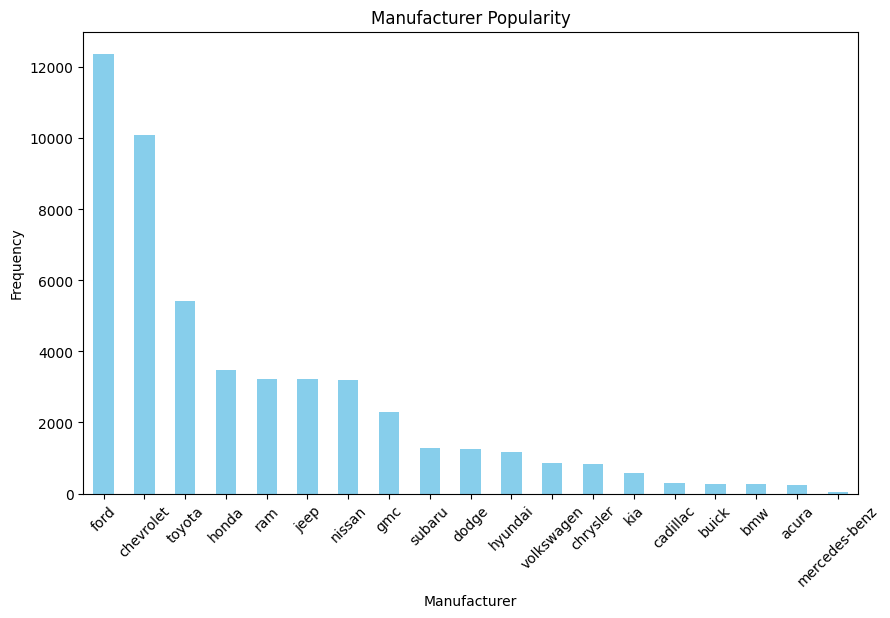

In [24]:
# Create a bar chart showing the frequency of each manufacturer

manufacturer_counts = df_vehicles['manufacturer'].value_counts()

plt.figure(figsize=(10, 6))
manufacturer_counts.plot(kind='bar', color='skyblue')
plt.title('Manufacturer Popularity')
plt.xlabel('Manufacturer')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**Student Note:**

I used the describe method above, in order to determine what the top manufacturer in the dataset was. In this case it's Ford. Then I created a bar chart so that we can visually see how the rest of the manufacturers compare. Ford & Chevrolet are the top two most popular.

In [22]:
# Provide summary statistics for the 'model' column, including count, unique values,
# top value (most frequent), and frequency of the top value.

model_summary = df_vehicles['model'].describe(include=['object'])

print(model_summary)


count          50382
unique           100
top       ford f-150
freq            2738
Name: model, dtype: object


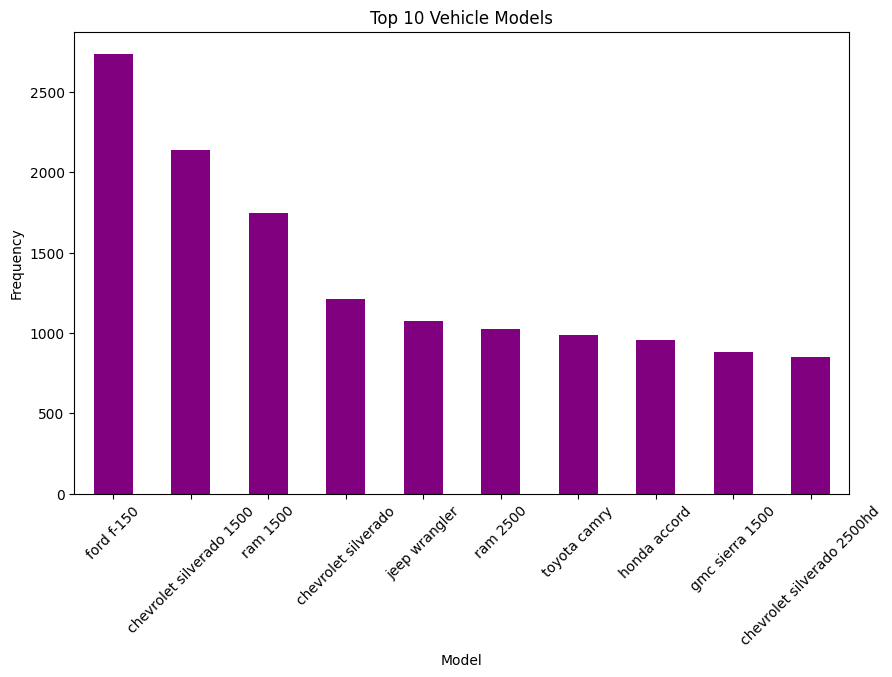

In [28]:
# Create a bar chart that shows the top 10 vehicle models

model_counts = df_vehicles['model'].value_counts().head(10)
plt.figure(figsize=(10, 6))
model_counts.plot(kind='bar', color='purple')
plt.title('Top 10 Vehicle Models')
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**Student Note:**

I created a bar chart above to get a visual look at the Top 10 vehicle models within the dataset. We know that Ford & Chevrolet are the top two manufcaturers. However, when we look specifically at model, we see that Ford & Chevorlet models only account for 40% of the top ten models within the dataset.

In [16]:
# Provide summary statistics for the 'type' column

type_summary = df_vehicles['type'].describe(include=['object'])

print(type_summary)

count     50382
unique       13
top         suv
freq      12219
Name: type, dtype: object


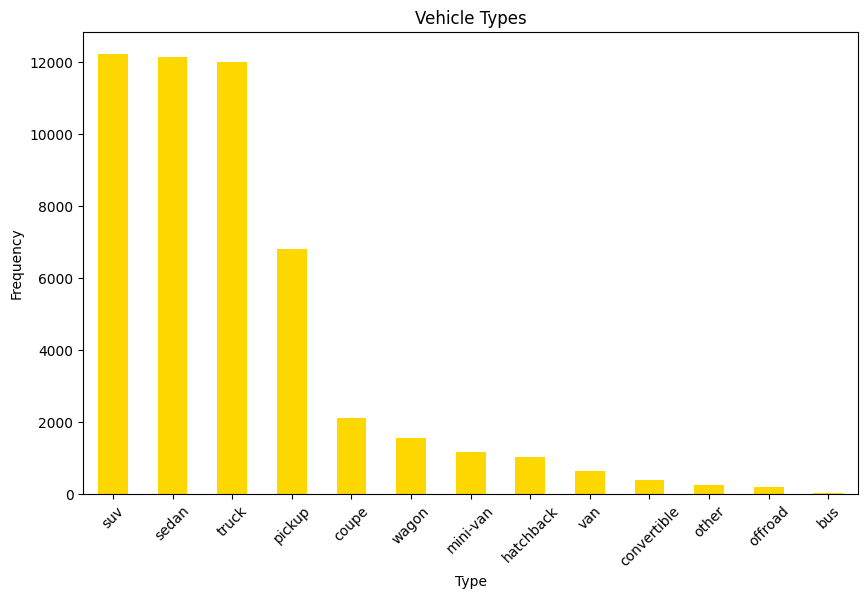

In [29]:
# Create a bar chart to compare most common vehicle type in the dataset

type_counts = df_vehicles['type'].value_counts()

plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='gold')
plt.title('Vehicle Types')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**Student Note:**

As we can see above, we have a clear top 3 in regard to vehicle type. Which is: SUV, Sedan & Truck. Pickup follows samewhat closely behind. All other models are not nearly as present as the top 3.

In [17]:
# Provide summary statistics for the 'paint_color' column

paint_color_summary = df_vehicles['paint_color'].describe(include=['object'])

print(paint_color_summary)

count     50382
unique       13
top       white
freq       9773
Name: paint_color, dtype: object


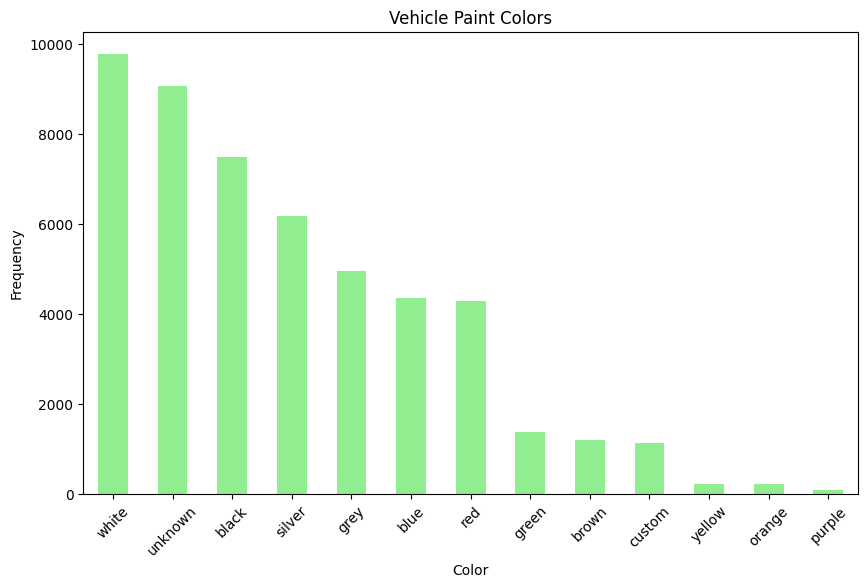

In [27]:
# Create a graph to compare the 'paint_color' column

paint_color_counts = df_vehicles['paint_color'].value_counts()

plt.figure(figsize=(10, 6))
paint_color_counts.plot(kind='bar', color='lightgreen')
plt.title('Vehicle Paint Colors')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**Student Note:** 

Above, I've created a bar character to visualize which vehicle colors are most present within the dataset. Here, we can see that white is the most common. If we exclude "unknown", black is a close second. 

In [18]:
# Provide summary statistics for the 'fuel' column

fuel_summary = df_vehicles['fuel'].describe(include=['object'])

print(fuel_summary)

count     50382
unique        5
top         gas
freq      46429
Name: fuel, dtype: object


In [19]:
# Provide summary statistics for the 'is_4wd' column

is_4wd_summary = df_vehicles['is_4wd'].describe(include=['object'])

print(is_4wd_summary)

count     50382
unique        2
top       False
freq      25479
Name: is_4wd, dtype: object


In [20]:
# Provide summary statistics for the 'transmission' column

transmission_summary = df_vehicles['transmission'].describe(include=['object'])

print(transmission_summary)

count         50382
unique            3
top       automatic
freq          45976
Name: transmission, dtype: object


# EDA Conclusion

Based on the analysis of our dataset of used vehicles for sale, several key findings emerge:

Color Preference: The analysis reveals that the most common color among available vehicles is white. This indicates a significant preference for white vehicles among consumers in the market for used cars.

Vehicle Type Distribution: The dataset illustrates that SUVs, sedans, and trucks are the most prevalent vehicle types. This suggests that these types of vehicles are in high demand among buyers in the used car market.

Manufacturer Dominance: While Ford and Chevrolet emerge as the most common manufacturers, it's notable that they collectively account for only 40% of the top 10 vehicle models. This implies a diverse range of manufacturers catering to consumer preferences and needs.

In summary, the analysis highlights the prevailing trends in the used car market, including color preferences, popular vehicle types, and the distribution of manufacturers. These insights can inform decision-making processes for stakeholders in the automotive industry, from manufacturers to dealerships and consumers alike.